In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

TypeError: __init__() got an unexpected keyword argument 'batch_size'

In [4]:
for i, (train_features, train_labels) in enumerate(train_dataloader):
    print(train_features.shape)
    if i == 0:
        break

torch.Size([64, 1, 28, 28])


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


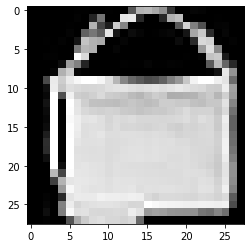

Label: 8


In [5]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [5]:
from datasets import load_dataset
dataset = load_dataset('poloclub/diffusiondb', '2m_first_1k')

Found cached dataset diffusiondb (C:/Users/norbe/.cache/huggingface/datasets/poloclub___diffusiondb/2m_first_1k/0.9.1/547894e3a57aa647ead68c9faf148324098f47f2bc1ab6705d670721de9d89d1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
test = dataset['train']
images_dataset = test["image"]
prompts_dataset = test["prompt"]

In [30]:
len(images_dataset)

1000

In [37]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
import torch


from torch.utils.data import Dataset
import torch
import torchvision.transforms as transforms
import json



In [41]:
with open('WORDMAP_coco_5_cap_per_img_5_min_word_freq.json') as json_file:
    word_map_dict = json.load(json_file)

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
train_loader = TestDataset(images_dataset, prompts_dataset, word_map_dict, transform=normalize)



In [42]:
t = next(iter(train_loader))
print(t.shape)
t

torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


tensor([[[0.0118, 0.0157, 0.0510,  ..., 0.2275, 0.2314, 0.2118],
         [0.0157, 0.0431, 0.0667,  ..., 0.2275, 0.2078, 0.1961],
         [0.0235, 0.0510, 0.0588,  ..., 0.2196, 0.2235, 0.2000],
         ...,
         [0.2627, 0.4471, 0.5608,  ..., 0.2588, 0.2392, 0.2000],
         [0.2549, 0.4471, 0.5529,  ..., 0.2745, 0.2392, 0.2078],
         [0.2275, 0.4118, 0.5529,  ..., 0.3412, 0.2510, 0.2314]],

        [[0.0039, 0.0157, 0.0471,  ..., 0.2471, 0.2392, 0.2078],
         [0.0078, 0.0314, 0.0588,  ..., 0.2431, 0.2118, 0.1922],
         [0.0157, 0.0275, 0.0431,  ..., 0.2275, 0.2275, 0.2118],
         ...,
         [0.2157, 0.4078, 0.5255,  ..., 0.0471, 0.0431, 0.0118],
         [0.2078, 0.4275, 0.5176,  ..., 0.0667, 0.0471, 0.0157],
         [0.1882, 0.3843, 0.5216,  ..., 0.1137, 0.0510, 0.0314]],

        [[0.0000, 0.0000, 0.0353,  ..., 0.2471, 0.2314, 0.2039],
         [0.0000, 0.0157, 0.0588,  ..., 0.2431, 0.2157, 0.1882],
         [0.0078, 0.0314, 0.0549,  ..., 0.2353, 0.2392, 0.

In [43]:
import torchvision.transforms as T
transform = T.ToPILImage()
img = transform(t)
img.show()

In [23]:
for i, (imgs, caps, caplens) in enumerate(train_loader):
    print(imgs.shape)
    if i == 0:
        break

In [13]:
imgs.shape

torch.Size([64, 1, 28, 28])

In [22]:
caps[48].item()

7